### Name: Nirajan Khatiwada

### Data Science Intern at Oasis Infobyte

### Task 5:  Sales Prediction Using Python

 #### Importing Required Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#### Loading the required data

In [2]:
# Reading the dataset
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Data Analysis

In [4]:
# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
# To get the shape of the data
df.shape

(200, 5)

In [7]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
# Dropping the 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"])

In [9]:
# To get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Displaying numerical description
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


#### Splitting into features (X) and target variable (y)

In [11]:
# Splitting into features (X) and target variable (y)
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [12]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [13]:
# Convert to integers
x_train = x_train.astype(int)
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)

In [14]:
# Standardize the features
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

#### Applying Linear Regression

In [15]:
# Applying Linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

#### Predictions and Evaluation

In [16]:
# Predictions
y_pred = lr.predict(x_test_scaled)

In [17]:
# Evaluate the performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.9222988021105913


#### Analyzing Data by Scatter Plot and Pairplot

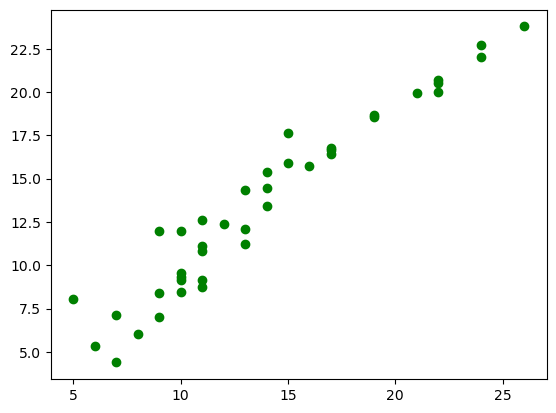

In [18]:
# Analyzing Data by Scatter Plot
plt.scatter(y_test, y_pred, c='g')
plt.show()

D:\Apps\APP_DATA\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


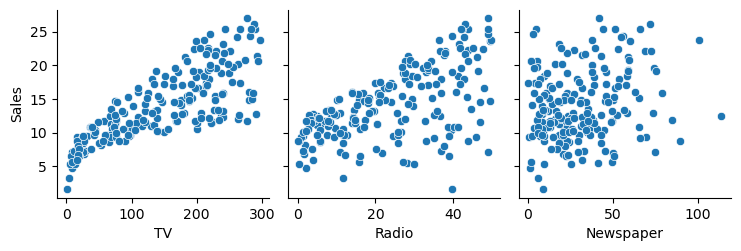

In [22]:
# Pairplot and Histograms
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

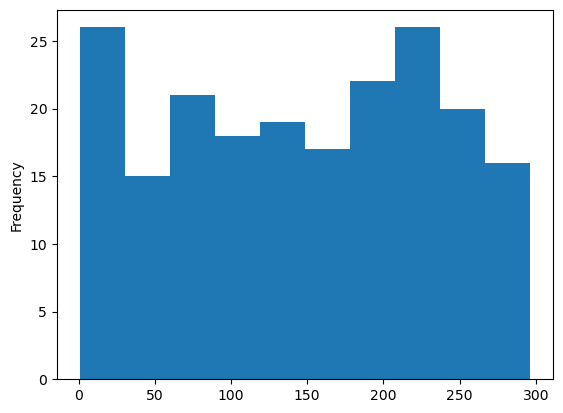

In [23]:
df['TV'].plot.hist(bins=10)
plt.show()

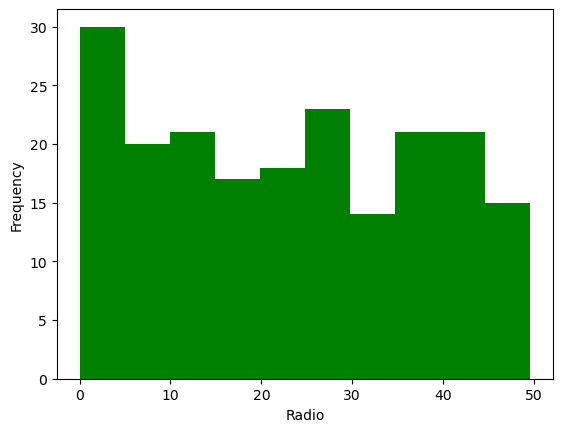

In [24]:
df['Radio'].plot.hist(bins=10, color='green', xlabel='Radio')
plt.show()

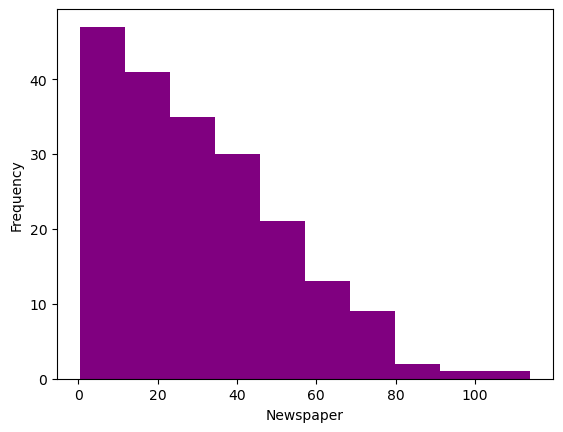

In [25]:
df['Newspaper'].plot.hist(bins=10, color='purple', xlabel='Newspaper')
plt.show()

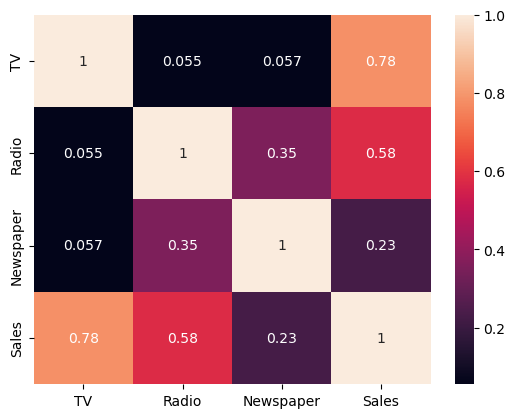

In [26]:
# Heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

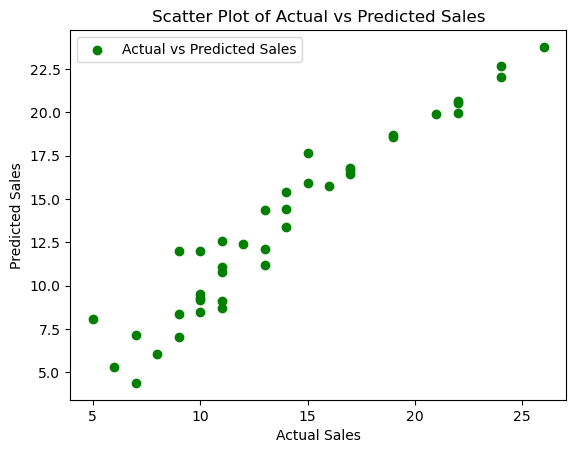

In [30]:
# Scatter Plot with Legend
plt.scatter(y_test, y_pred, c='g', label='Actual vs Predicted Sales')
plt.title('Scatter Plot of Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()